#Libraries and  data import 

In [1]:

import sklearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # to use KNN method
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split






#plotting the data

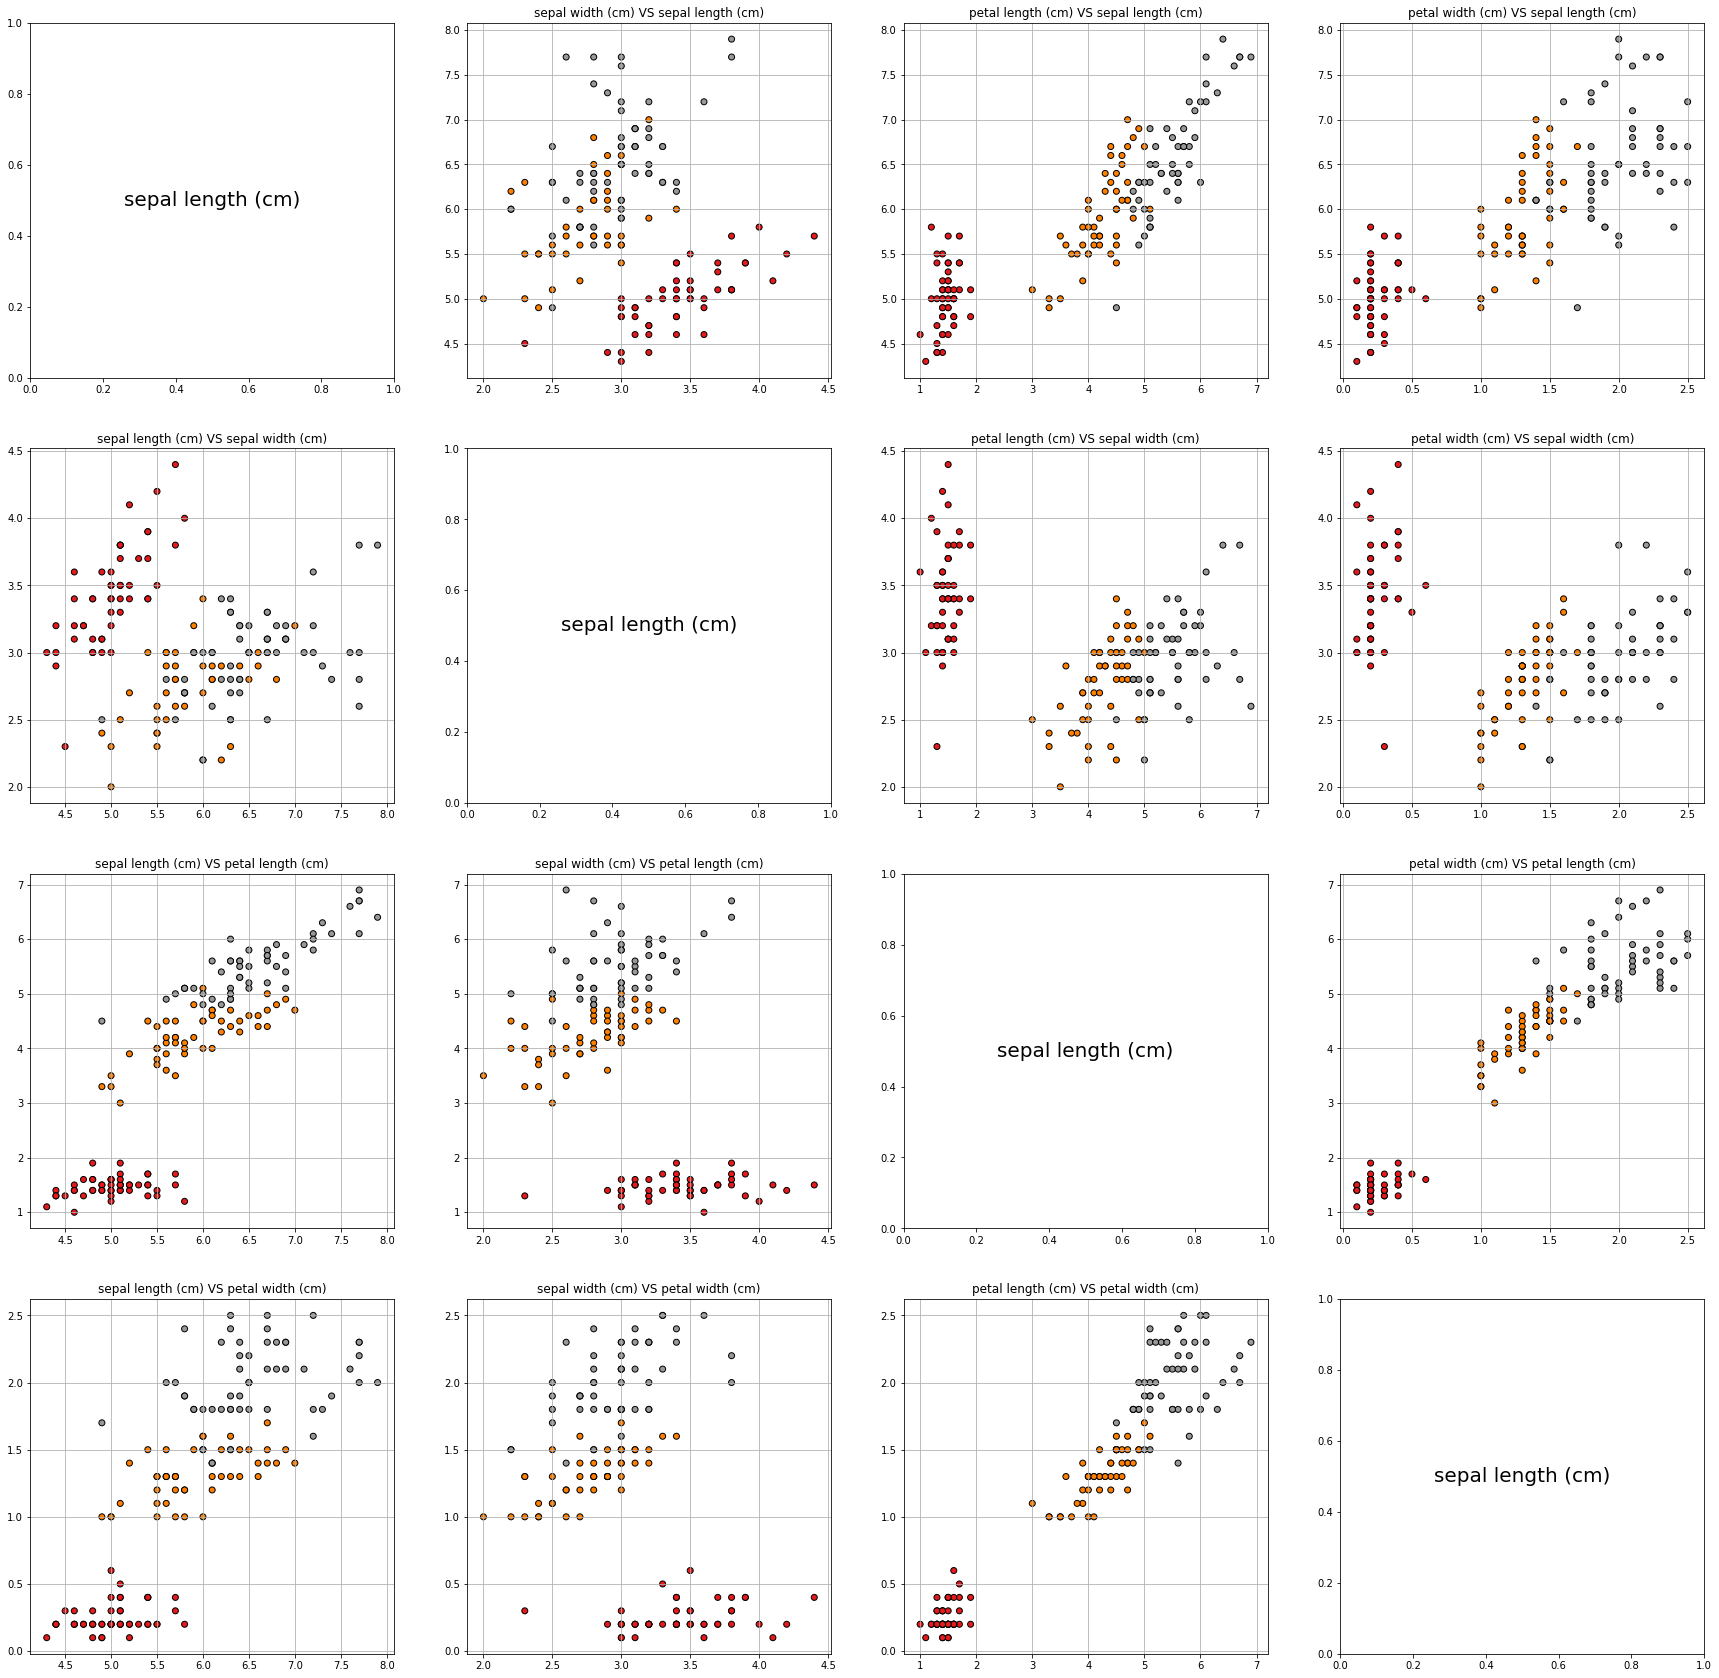

In [2]:

################################################################################################

iris = sklearn.datasets.load_iris()# loading the data set
figure, axis = plt.subplots(4, 4, figsize=(30,30));
plt.set_cmap(plt.cm.Set1)
array = [0,1,2,3];# loop array

#plotting the data 
for i in array :
  y_min, y_max =  iris.data[:,i].min() - 0.5, iris.data[:,i].max() + 0.5
  for j in array:
    if i == j :
      axis[i, j].text(0.5, 0.5, iris.feature_names[0], horizontalalignment='center', verticalalignment='center', fontsize = 20)
    else :
      x_min, x_max = iris.data[:,j].min() - 0.5, iris.data[:,j].max() + 0.5
      axis[i, j].title.set_text(iris.feature_names[j] + " VS " + iris.feature_names[i]);
      axis[i, j].scatter(iris.data[:,j] , iris.data[:,i], c=iris.target , cmap=plt.cm.Set1, edgecolor="k");
      axis[i, j].grid()

# plotting the classification map using KNN method


*   the KNN model fitted in each loop itteration using the training data and according to the two current measured properties of the iris, then the map is plotted with the test data on it.






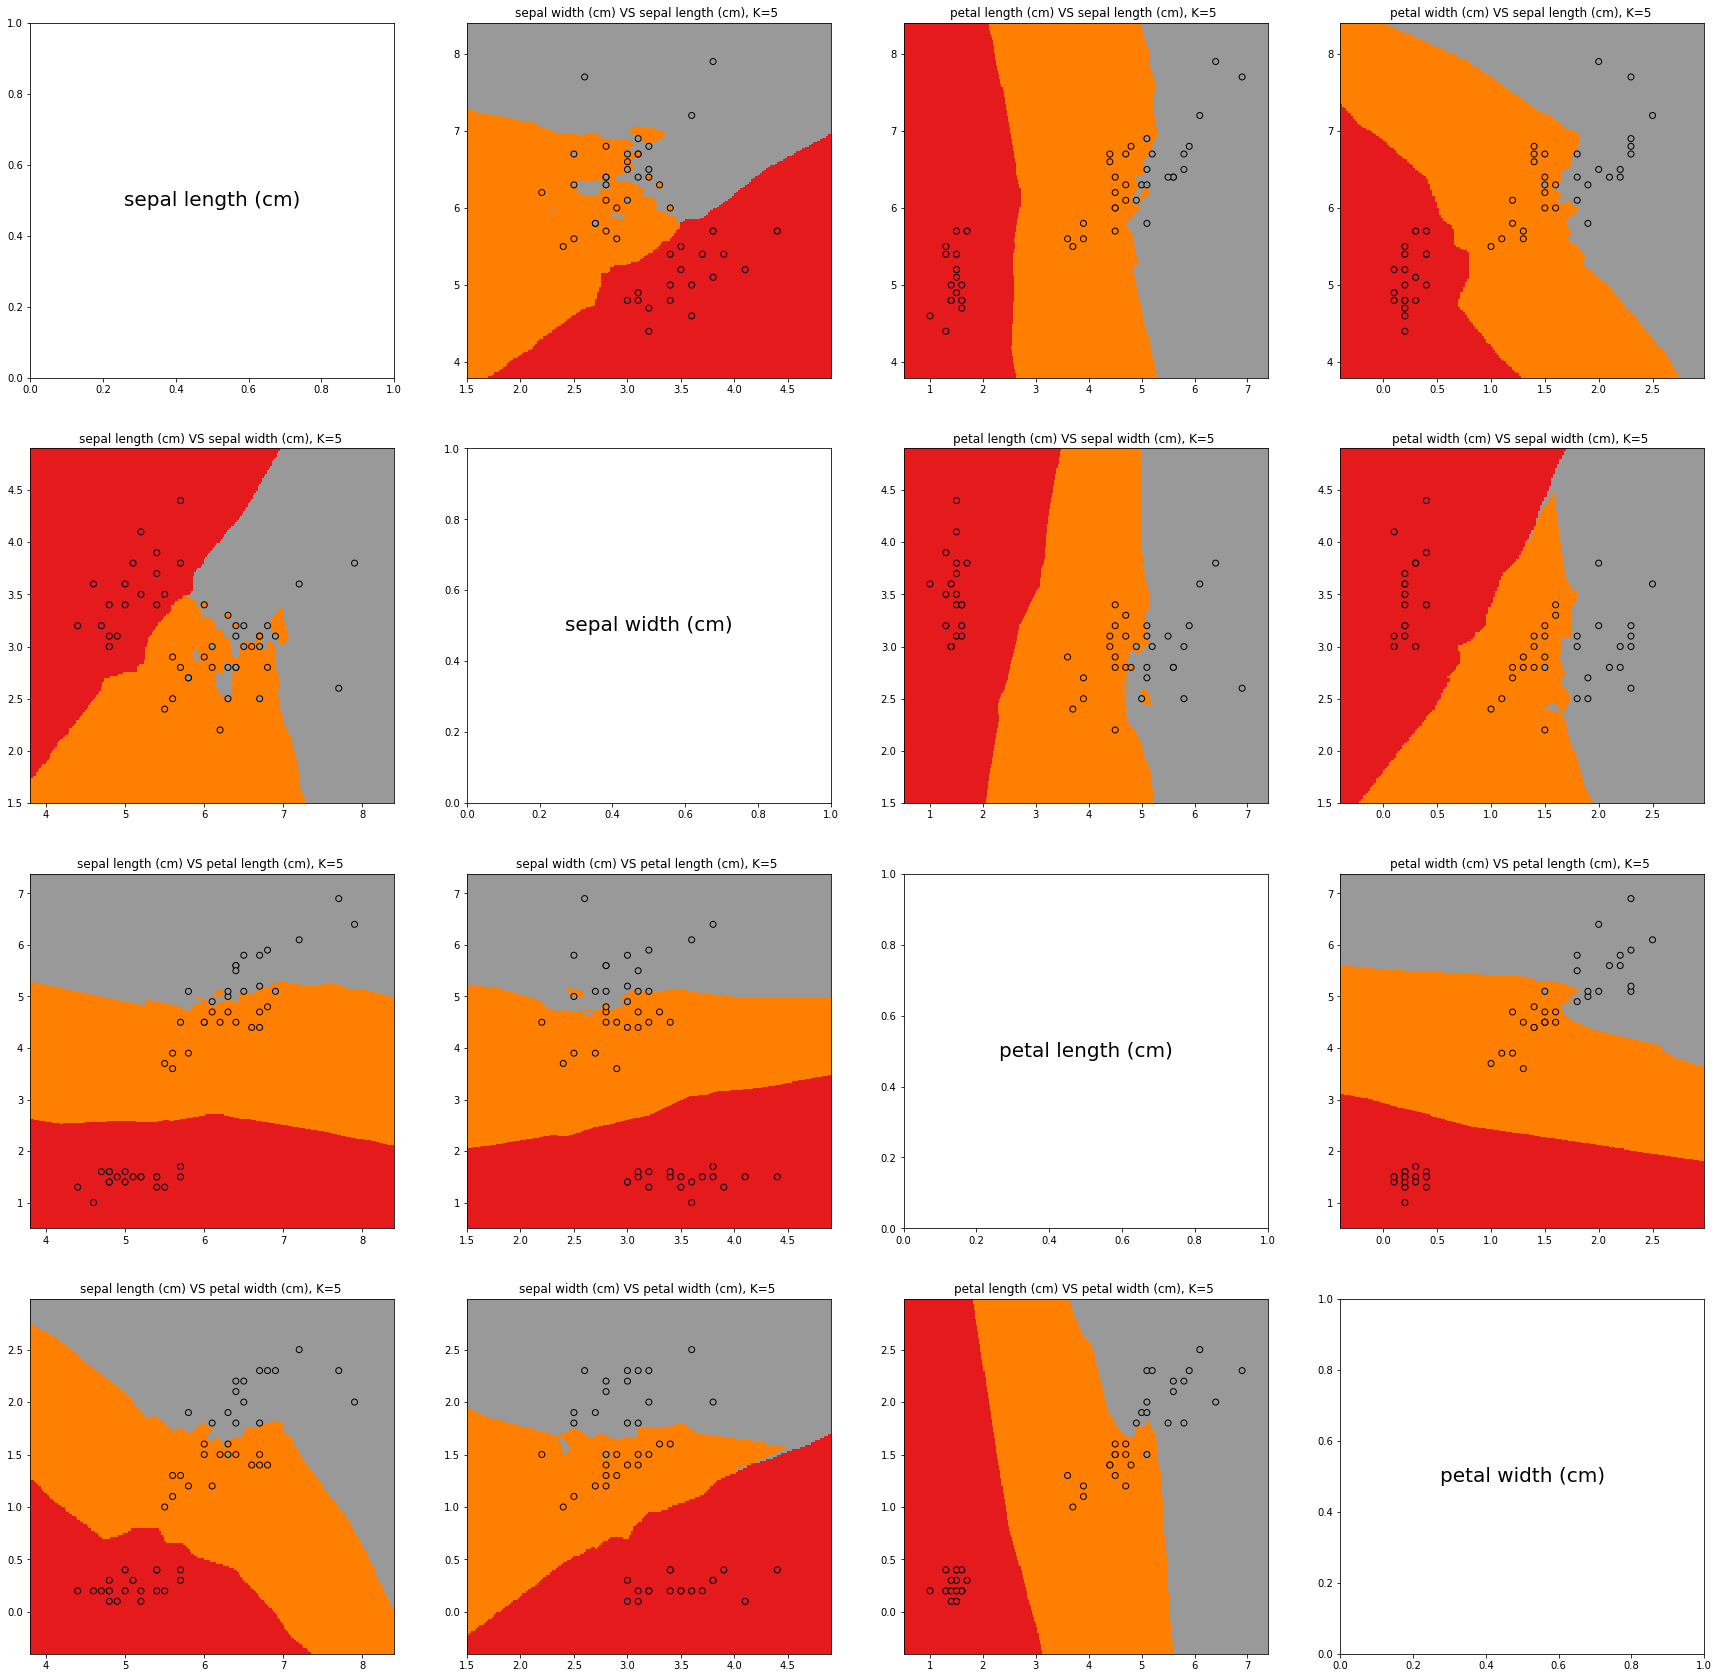

In [3]:
################################################################################################
#KNN plot and for each ot the properties combination

array = [0,1,2,3];# loop array
figure, axis = plt.subplots(4, 4, figsize=(30,30))
h = .02 # step size in the mesh

KNN = KNeighborsClassifier(n_neighbors=4) #k=5 default
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:], iris.target, test_size=0.33, random_state=42)

for i in array :
  y_min, y_max =  iris.data[:,i].min() - 0.5, iris.data[:,i].max() + 0.5
  for j in array:
    if i == j :
      axis[i,j].text(0.5, 0.5, iris.feature_names[j], horizontalalignment='center', verticalalignment='center', fontsize = 20)
    else :
      KNN.fit(np.stack((X_train[:,j], X_train[:,i]), axis=1)   , y_train)
      x_min, x_max = iris.data[:,j].min() - .5, iris.data[:,j].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      axis[i,j].pcolormesh(xx, yy, Z)
      axis[i,j].scatter(X_test[:,j], X_test[:,i], c=y_test, cmap=plt.cm.Set1, edgecolor="k" )
      axis[i,j].title.set_text(iris.feature_names[j] + " VS " + iris.feature_names[i] + ", K=5 ")


# plotting a confusion matrix to the KNN method

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


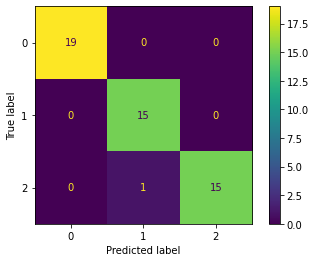

In [4]:
################################################################################################
#KNN classification and its confusion matrix
FittedModel = KNN.fit(X_train, y_train)
sklearn.metrics.plot_confusion_matrix(FittedModel, X_test, y_test)

#plotting a confusion matrix to the Logistic Regression method

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


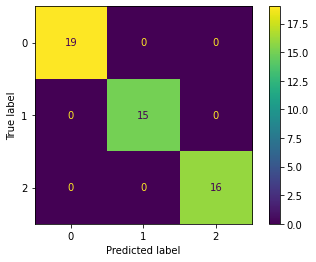

In [5]:

################################################################################################
#Logistic regression classification and its confusion matrix
LogReg = LogisticRegression()
FittedModel = LogReg.fit(X_train, y_train)
sklearn.metrics.plot_confusion_matrix(FittedModel, X_test, y_test);
